# **Mini-Projeto MLP**
---

Este mini-projeto tem como objetivo construir modelos preditivos para estimar a sobrevivência dos passageiros do Titanic utilizando Redes Neurais baseadas em Multilayer Perceptron (MLP). O naufrágio do Titanic é um dos desastres marítimos mais infames da história, e a análise dos dados dos passageiros fornece uma rica base para explorar técnicas de aprendizado de máquina.

**Objetivos:**
- Pré-processar os dados do Titanic para torná-los adequados para treinamento de modelos de aprendizado de máquina.
- Construir e treinar Redes Neurais baseadas em Multilayer Perceptron (MLP) para prever a sobrevivência dos passageiros.
- Avaliar o desempenho dos modelos utilizando métricas adequadas e ajustar hiperparâmetros para otimização.

**Metodologia:**
1. **Coleta e Exploração de Dados:** Carregamento e análise inicial dos dados para entender a distribuição e características principais.
2. **Pré-processamento de Dados:** Tratamento de valores ausentes, codificação de variáveis categóricas e normalização dos dados.
3. **Construção do Modelo MLP:** Definição das arquiteturas das redes neurais e configuração dos hiperparâmetros.
4. **Treinamento e Avaliação:** Treinamento dos modelos nos dados de treinamento e avaliação de seus desempenhos nos dados de teste.

**Grupo:**
* Cleber Victor da Silva Junior (cvsj)   
* João Marcelo de Souza Ferreira (jmsf3)
* Marcela Arruda Asfora (maa5)
* Maria Vitória Soares Muniz (mvsm3)
* Victor Pessoa Diniz (vpd)

## **Bibliotecas Utilizadas**
---

Neste projeto, utilizamos diversas bibliotecas do ecossistema Python para análise de dados e visualização:

- **NumPy:** Biblioteca fundamental para computação numérica em Python, utilizada para manipulação de arrays e operações matemáticas eficientes.
- **Pandas:** Biblioteca poderosa para análise e manipulação de dados, especialmente útil para trabalhar com dados tabulares. Utilizamos Pandas para carregar, limpar e transformar os dados do Titanic.
- **Seaborn:** Biblioteca de visualização de dados baseada no Matplotlib, que proporciona gráficos estatísticos atraentes e informativos. Utilizamos Seaborn para criar visualizações que ajudam a entender melhor os padrões e características dos dados.
- **Matplotlib:** Biblioteca de plotagem 2D que serve como base para o Seaborn, utilizada diretamente para personalizar e criar gráficos detalhados.
- **Scikit-learn:** Biblioteca modular que contém os modelos de treinamento necessários para a atividade. Utilizada para o treinamento das Redes Neurais baseadas em MLP.

Essas bibliotecas, quando combinadas, fornecem um conjunto robusto de ferramentas para a análise de dados e a construção de modelos preditivos.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score

## **Base de Dados**
---

O dataset "Titanic - Machine Learning from Disaster" é um conjunto de dados clássico amplamente utilizado para o ensino e prática de técnicas de aprendizado de máquina. Ele contém informações detalhadas sobre os passageiros a bordo do RMS Titanic, que naufragou em sua viagem inaugural em 1912. O dataset inclui variáveis como idade, gênero, classe de cabine, tarifa paga, número de parentes a bordo, entre outras. A variável alvo é `Survived`, que indica se um passageiro sobreviveu ao desastre. Este conjunto de dados é ideal para explorar métodos de análise de dados, visualização, e construção de modelos preditivos, fornecendo uma rica base para entender como diferentes características podem influenciar a probabilidade de sobrevivência.

In [ ]:
!git clone https://github.com/victorpdiniz/IF684-Titanic.git

Cloning into 'Titanic-MLP'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 9 (delta 0), reused 6 (delta 0), pack-reused 0
Receiving objects: 100% (9/9), 34.33 KiB | 857.00 KiB/s, done.


In [ ]:
test_set = pd.read_csv('Titanic-MLP/data/test.csv')
train_set = pd.read_csv('Titanic-MLP/data/train.csv')

## **Análise Exploratória**
---

A análise exploratória dos dados é uma fase inicial que resume as principais características dos dados usando métodos visuais e estatísticos. Seu objetivo é compreender a estrutura dos dados, detectar padrões, identificar anomalias e verificar pressupostos, orientando o desenvolvimento de modelos preditivos. Nesta análise, abordaremos os seguintes tópicos: **Organização da Base de Dados**, **Correlação** e **Dados Faltantes e Outliers**.

### **Organização da Base de Dados**

A base de dados  possui 891 linhas (cada linha representa um passageiro) e 12 colunas (cada coluna contém um atributo do passageiro, como identificador, idade, classe social, etc.). Na lista abaixo, estão todos os detalhes das colunas:

* **`PassengerId`:** Identificador único de cada passageiro (valores inteiros, sem valores ausentes).
* **`Survived`:** Indica se o passageiro sobreviveu ou não (valores inteiros: `1` para sobreviveu, `0` para não sobreviveu).
* **`Pclass`:** Classe social do passageiro (valores inteiros: `1` para primeira classe, `2` para segunda classe, `3` para terceira classe).
* **`Name`:** Nome completo do passageiro (valores de texto).
* **`Sex`:** Sexo do passageiro (valores de texto: `'male'` para masculino, `'female'` para feminino).
* **`Age`:** Idade do passageiro em anos (valores decimais, com alguns valores ausentes).
* **`SibSp`:** Número de irmãos e cônjuge a bordo (valores inteiros).
* **`Parch`:** Número de pais e filhos a bordo (valores inteiros).
* **`Ticket`:** Número do bilhete do passageiro (valores de texto).
* **`Fare`:** Tarifa paga pelo passageiro (valores decimais).
* **`Cabin`:** Número da cabine do passageiro (valores de texto, com muitos valores ausentes).
* **`Embarked`:** Porto de embarque do passageiro (valores de texto: `'S'` para Southampton, `'C'` para Cherbourg, `'Q'` para Queenstown).





In [ ]:
train_set.shape

(891, 12)

In [ ]:
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_set.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Variáveis numéricas
numeric_features = train_set.select_dtypes(include=np.number)
numeric_features.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [ ]:
# Variáveis categóricas
catagoric_features = train_set.select_dtypes(exclude=np.number)
catagoric_features.columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

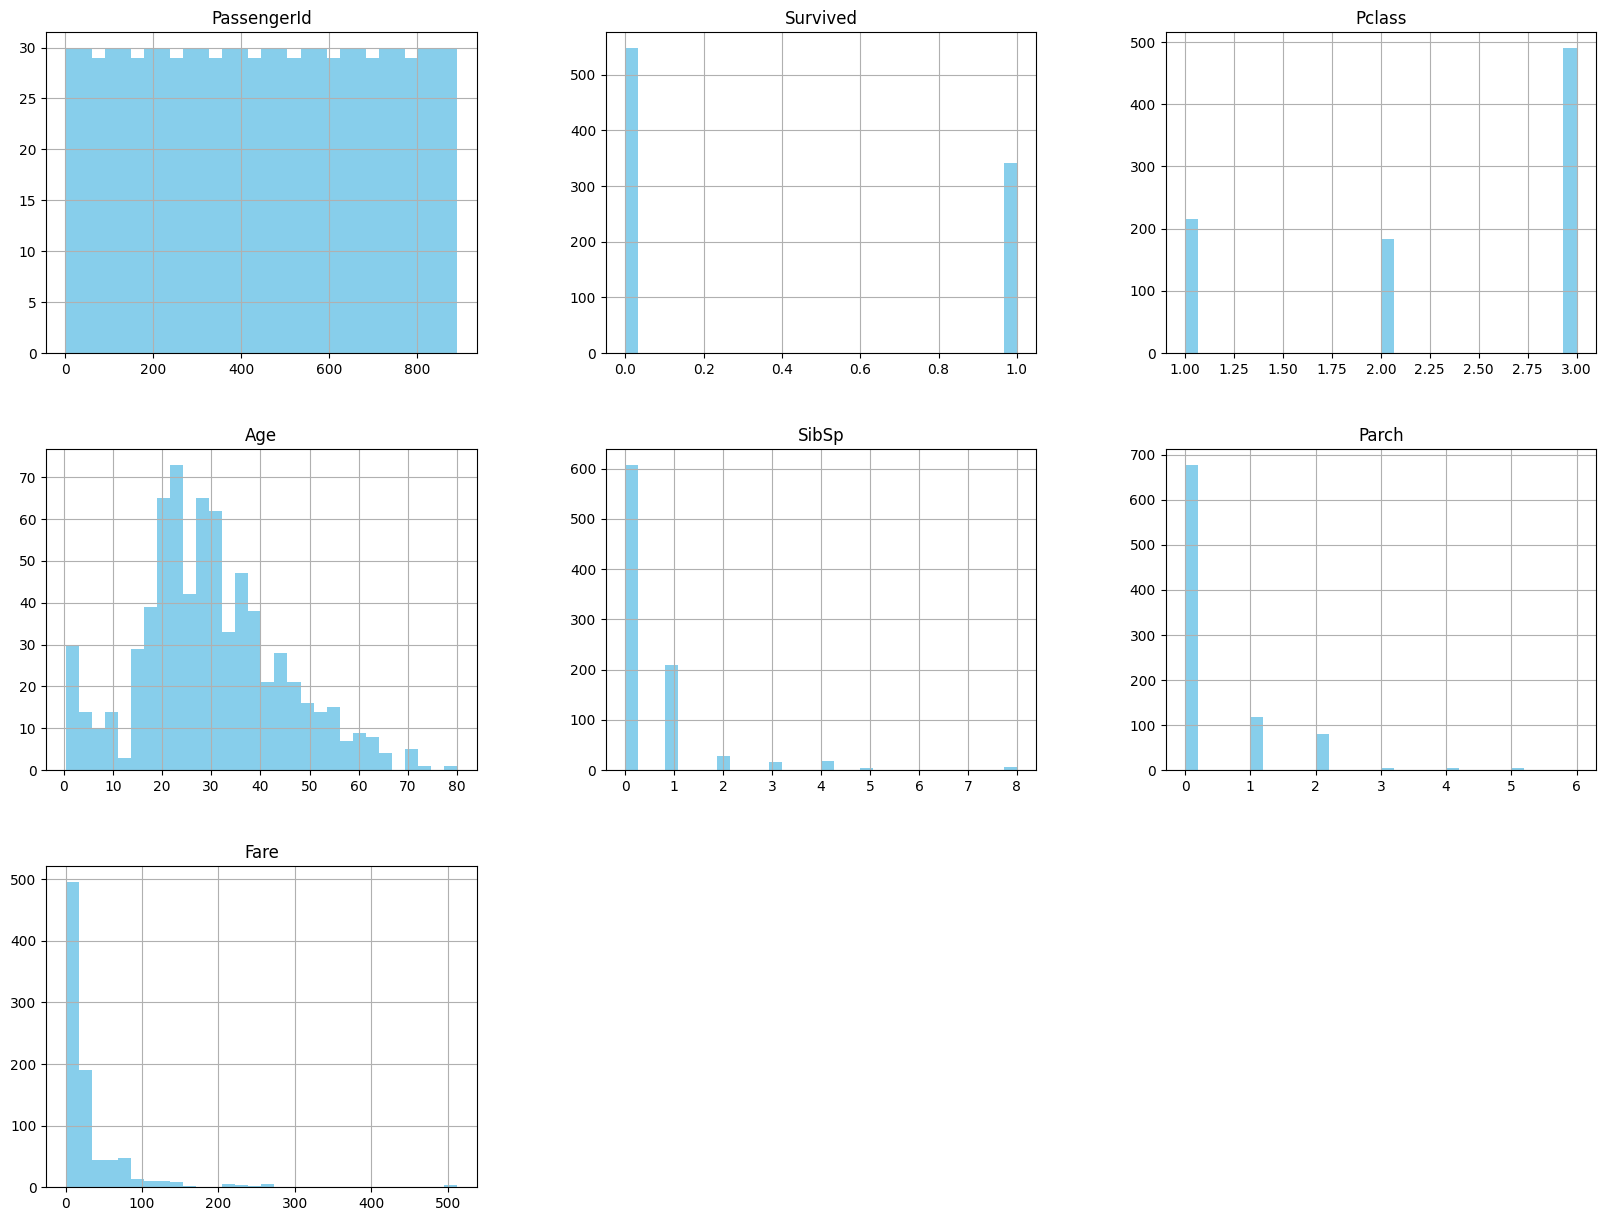

In [ ]:
train_set.hist(bins=30, figsize=(20, 15), color='skyblue')
plt.show()

### **Correlação**

A análise de correlações entre variáveis é uma etapa fundamental na exploração e entendimento de um conjunto de dados. Correlações indicam o grau de relacionamento entre duas variáveis e podem fornecer insights valiosos sobre como uma variável pode influenciar outra.

In [ ]:
# Correlação das variáveis numéricas em relação ao atributo 'Survived'
correlation = numeric_features.corr()
print(correlation['Survived'].sort_values(ascending=False), '\n')

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64 



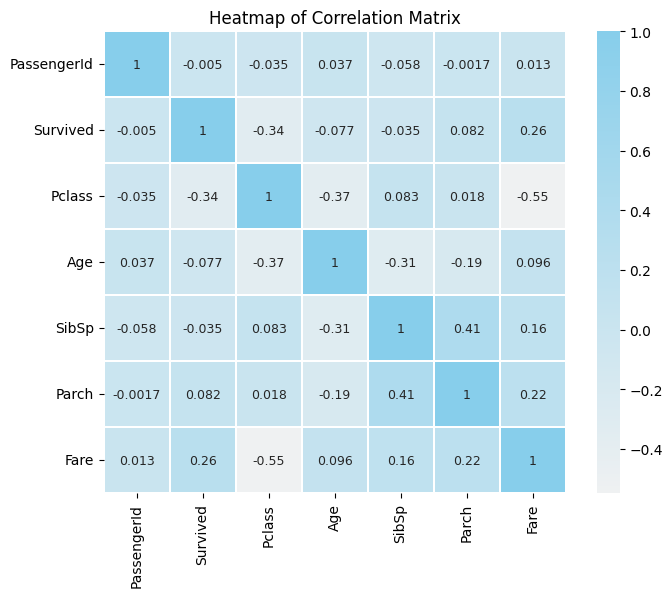

In [ ]:
# Mapa de calor da matriz de correlação entre todas as variáveis
cmap = sns.light_palette('skyblue', as_cmap=True)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, square=True, cmap=cmap, annot=True, annot_kws={'size': 9}, linecolor='white', linewidths=0.01)
plt.title('Heatmap of Correlation Matrix')
plt.show()

A seguir, analisaremos a frequência de sobrevivência dos passageiros em relação à colunas relacionadas.

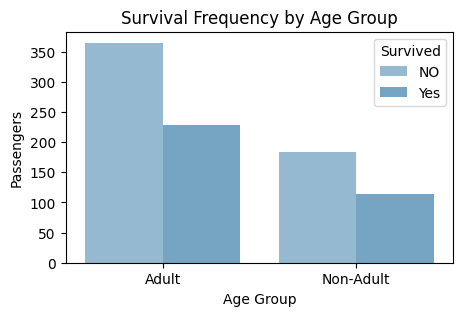

In [ ]:
# Criando um DataFrame para categorizar passageiros adultos e não adultos
train_set['AgeGroup'] = train_set['Age'].apply(lambda x: 'Adult' if x >= 18 and x<= 65 else 'Non-Adult')

# Configurando a paleta de cores
sns.set_palette('Blues_d')

# Plotando a frequência de sobrevivência por classes de idade
plt.figure(figsize=(5, 3))
sns.countplot(x='AgeGroup', hue='Survived', data=train_set)
plt.title('Survival Frequency by Age Group')

plt.xlabel('Age Group')
plt.ylabel('Passengers')
plt.legend(title='Survived', labels=['NO', 'Yes'])

plt.show()
train_set = train_set.drop(['AgeGroup'], axis=1)

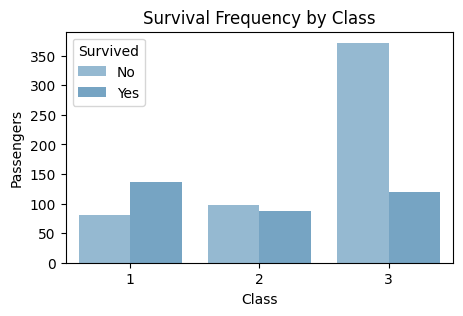

In [ ]:
# Gráfico de sobrevivência por classe social
plt.figure(figsize=(5, 3))
sns.countplot(x='Pclass', hue='Survived', data=train_set)
plt.title('Survival Frequency by Class')

plt.xlabel('Class')
plt.ylabel('Passengers')
plt.legend(title='Survived', labels=['No','Yes'])

plt.show()

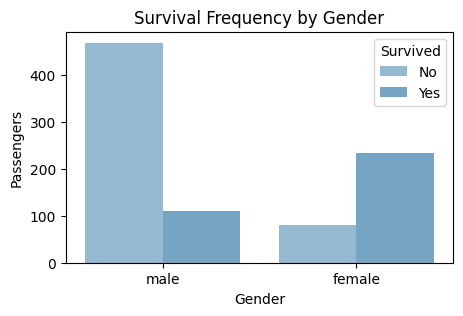

In [ ]:
# Gráfico de sobrevivência por sexo
plt.figure(figsize=(5, 3))
sns.countplot(x='Sex', hue='Survived', data=train_set)
plt.title('Survival Frequency by Gender')

plt.xlabel('Gender')
plt.ylabel('Passengers')
plt.legend(title='Survived', labels=['No','Yes'])

plt.show()

### **Dados Faltantes e Outliers**

A coluna `Age` apresenta 177 valores faltantes, indicando que uma quantidade significativa de passageiros não teve sua idade registrada. A coluna `Cabin` é a que apresenta o maior número de dados ausentes, com 687 valores faltantes, sugerindo que muitas cabines não foram registradas ou os passageiros não tinham uma cabine específica. A coluna `Embarked` possui apenas 2 valores faltantes, mostrando que a maioria dos passageiros tem o porto de embarque registrado.

In [ ]:
missing = train_set.isnull().sum()
print(missing)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


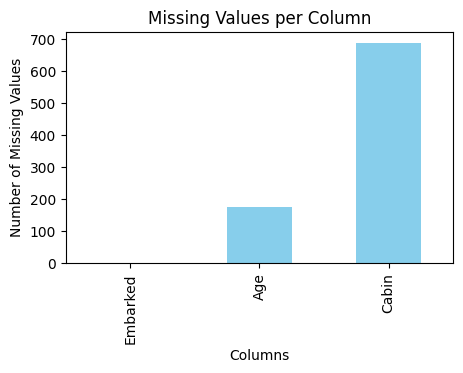

In [ ]:
missing = missing[missing > 0]
missing.sort_values(inplace=True)

missing.plot.bar(color='skyblue', figsize=(5, 3))
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.title('Missing Values per Column')

plt.show()

In [ ]:
outliers = {}

for col in train_set.columns:
    if pd.api.types.is_numeric_dtype(train_set[col]):
        Q1 = train_set[col].quantile(0.25)
        Q3 = train_set[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = train_set[(train_set[col] < lower_bound) | (train_set[col] > upper_bound)][col].count()

print('Number of Outliers per Column:')
print(outliers)

Number of Outliers per Column:
{'PassengerId': 0, 'Survived': 0, 'Pclass': 0, 'Age': 11, 'SibSp': 46, 'Parch': 213, 'Fare': 116}


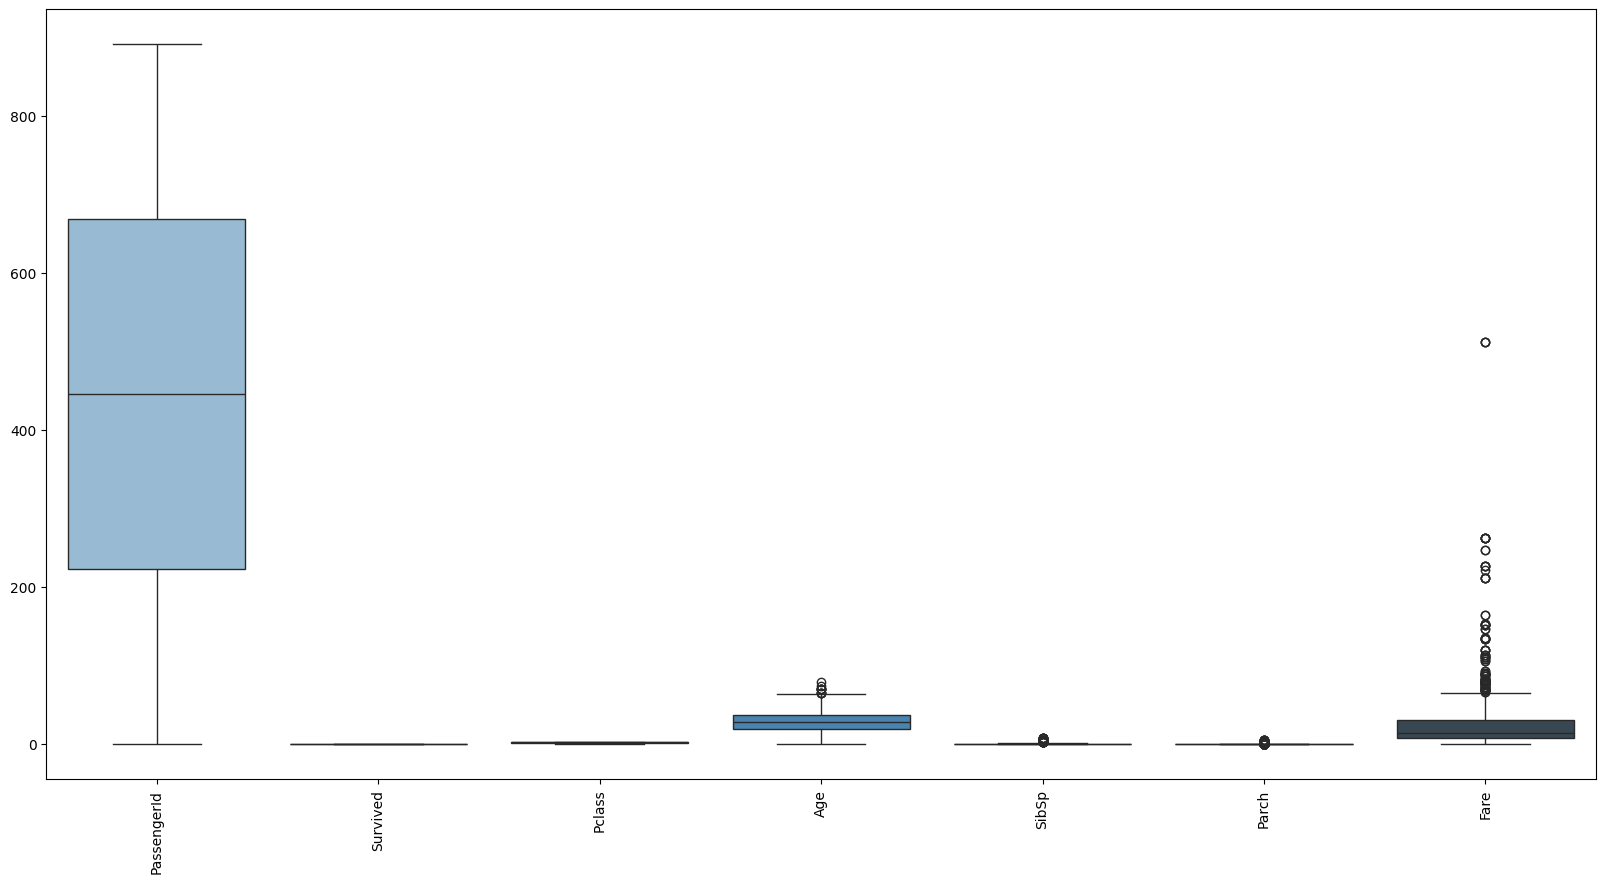

In [ ]:
# Plotando outliers
plt.figure(figsize=(20, 10))
sns.boxplot(data=train_set, palette='Blues_d')
plt.xticks(rotation=90)
plt.show()

## **Tratamento dos Dados**
---

O tratamento dos dados é uma etapa crucial para garantir que o modelo preditivo possa aprender de maneira eficiente e produzir resultados precisos. No projeto de previsão de sobrevivência dos passageiros do Titanic, realizamos as seguintes etapas de pré-processamento: **Tratamento de Valores Ausentes**, **Codificação de Variáveis Categóricas**, **Escalonamento de Dados** e **Remoção de Colunas Irrelevantes**.

### **Tratamento de Valores Ausentes**

- **`Age`:** Valores ausentes são preenchidos com a mediana das idades dos passageiros.
- **`Fare`:** Valores ausentes são preenchidos com a média dos valores do atributo.
- **`Cabin`:** Devido ao grande número de valores ausentes, esta coluna é descartada.
- **`Embarked`:** Valores ausentes são preenchidos com o porto de embarque mais frequente.

In [ ]:
from sklearn.impute import SimpleImputer

# Preencher valores ausentes na coluna 'Age' com a mediana
age_imputer = SimpleImputer(strategy='median')
test_set['Age'] = age_imputer.fit_transform(test_set[['Age']])
train_set['Age'] = age_imputer.fit_transform(train_set[['Age']])

# Remover os valores ausentes da coluna 'Fare'
fare_imputer = SimpleImputer(strategy='mean')
test_set['Fare'] = age_imputer.fit_transform(test_set[['Fare']])
train_set['Fare'] = age_imputer.fit_transform(train_set[['Fare']])

# Descartar a coluna 'Cabin' devido ao grande número de valores ausentes
test_set.drop(columns=['Cabin'], inplace=True)
train_set.drop(columns=['Cabin'], inplace=True)

# Preencher valores ausentes na coluna 'Embarked' com o valor mais frequente
embarked_imputer = SimpleImputer(strategy='most_frequent')
test_set['Embarked'] = embarked_imputer.fit_transform(test_set[['Embarked']]).ravel()
train_set['Embarked'] = embarked_imputer.fit_transform(train_set[['Embarked']]).ravel()

# Verificar se ainda há valores ausentes
print(test_set.isnull().sum(), '\n')
print(train_set.isnull().sum())

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64 

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


### **Codificação de Variáveis Categóricas**

- **`Pclass`:** Utilizamos One-Hot Encoding para transformar os valores de classe social em variáveis binárias.
- **`Sex`:** Utilizamos One-Hot Encoding para transformar os valores de gênero em variáveis binárias.
- **`Embarked`:** Utilizamos One-Hot Encoding para transformar os valores categóricos (`'C'`, `'Q'`, `'S'`) em variáveis binárias.

In [ ]:
# Codificar as variáveis categóricas
test_set = pd.get_dummies(test_set, columns=['Pclass', 'Sex', 'Embarked'])
train_set = pd.get_dummies(train_set, columns=['Pclass', 'Sex', 'Embarked'])

### **Escalonamento de Dados**


- **`Age`:** A coluna de idades é escalonada para garantir que todas as características estejam na mesma escala. Utilizamos o escalonamento Min-Max ou padronização (`StandardScaler`).
- **`SibSp`:** Escalonamos o número de irmãos e cônjuge a bordo usando as mesmas técnicas que a coluna de idades.
- **`Parch`:** Escalonamos o número de pais e filhos a bordo usando as mesmas técnicas que a coluna de idades.
- **`Fare`:** Também escalonamos as tarifas usando as mesmas técnicas que a coluna de idades.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Escalonamento Min-Max para a coluna 'Age'
test_set['Age'] = scaler.fit_transform(test_set[['Age']])
train_set['Age'] = scaler.transform(train_set[['Age']])

# Escalonamento Min-Max para a coluna 'SibSp'
test_set['SibSp'] = scaler.fit_transform(test_set[['SibSp']])
train_set['SibSp'] = scaler.transform(train_set[['SibSp']])

# Escalonamento Min-Max para a coluna 'Parch'
test_set['Parch'] = scaler.fit_transform(test_set[['Parch']])
train_set['Parch'] = scaler.transform(train_set[['Parch']])

# Escalonamento Min-Max para a coluna 'Fare'
test_set['Fare'] = scaler.fit_transform(test_set[['Fare']])
train_set['Fare'] = scaler.transform(train_set[['Fare']])

### **Remoção de Colunas Irrelevantes**


- **`PassengerId`:** Esta coluna não possui relevância preditiva e é removida.
- **`Name`:** Esta coluna também não possui relevância preditiva, logo, é removida.
- **`Ticket`:** Esta coluna é removida, a menos que se decida extrair algum padrão ou característica útil.

In [ ]:
# Remover colunas irrelevantes
test_set.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)
train_set.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

In [ ]:
test_set.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.452723,0.000,0.000000,0.015282,False,False,True,False,True,False,True,False
1,0.617566,0.125,0.000000,0.013663,False,False,True,True,False,False,False,True
2,0.815377,0.000,0.000000,0.018909,False,True,False,False,True,False,True,False
3,0.353818,0.000,0.000000,0.016908,False,False,True,False,True,False,False,True
4,0.287881,0.125,0.111111,0.023984,False,False,True,True,False,False,False,True


In [ ]:
train_set.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,0.287881,0.125,0.0,0.014151,False,False,True,False,True,False,False,True
1,1,0.498879,0.125,0.0,0.139136,True,False,False,True,False,True,False,False
2,1,0.340630,0.000,0.0,0.015469,False,False,True,True,False,False,False,True
3,1,0.459317,0.125,0.0,0.103644,True,False,False,True,False,False,False,True
4,0,0.459317,0.000,0.0,0.015713,False,False,True,False,True,False,False,True


## **Análise Experimental**
---

Para treinar a Rede Neural utilizando o método MLPClassifier da biblioteca `sklearn.neural_network`, seguimos um processo bem definido que envolve as seguintes etapas: **Separação de Sets, Treinamento / Teste de Modelos e Validação.**

### **Separação de Sets**

Primeiramente, dividimos o conjunto de treino (`train_set`) em `X_train`, `y_train`, `X_test` e `y_test`, utilizando o conjunto de teste original para a validação final.

In [ ]:
# Separação dos dados
y = train_set['Survived']
X = train_set.drop(['Survived'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=42)

### **Treinamento / Teste de Modelos**

Para realizar uma análise abrangente dos dados, treinamos a Rede Neural utilizando diferentes arquiteturas e parâmetros do MLPClassifier. As principais variáveis modificadas são:

- **`hidden_layer_sizes`:** Número de neurônios na camada oculta, `default = (100,)`.
- **`activation`:** Função de ativação para a camada oculta.
  - `identity`: Função identidade, $f(x) = x$
  - `logistic`: Função sigmóide logística, $f(x) = \frac{1}{1 + e^{-x}}$
  - `tanh`: Função tangente hiperbólica, $f(x) = tanh(x)$
  - `relu`: Função unidade linear retificada, $f(x) = max(0,x)$
- **`solver`:** Algoritmo de otimização dos pesos.
  - `lbfgs`: Otimização na família dos métodos Quase-Newton.
  - `sgd`: Gradiente Descendente Estocástico.
  - `adam`: Algoritmo de otimização adaptativa.
- **`learning_rate`:** Taxa de aprendizado para atualização de pesos, default= constant.
  - `constant`: Taxa de aprendizado constante definida por `learning_rate_init`.
  - `invscaling`: Diminui gradualmente a taxa de aprendizado em cada época `t` usando um expoente inverso de `power_t`. `effective_learning_rate` = `learning_rate_init` / pow(`t`, `power_t`).
  - `adaptive`: Mantém a taxa de aprendizado constante enquanto o erro continua diminuindo. Se o erro não diminuir em pelo menos `tol` em duas épocas consecutivas, a taxa de aprendizado é dividida por `5`.
- **`alpha`:** Força do termo de regularização L2, default= `0.0001`.

Este método permite a experimentação e ajuste fino dos parâmetros para analisar o desempenho da Rede Neural.

A fim de treinar usando vários parâmetros diferentes, iremos modificar um a um nos treinos, seguindo a seguinte ordem:
- Função e Otimizador
- Taxa de Aprendizagem
- Alpha
- Camadas Escondidas

Treinamos os modelos e fazemos um teste para descobrir quais são os mais efetivos entre eles. Fixamos os valores de `alpha`, `hidden_layers_sizes` e `learning_rate` para verificar quais são os resultados mais eficazes.

Ao selecionar a métrica mais adequada para avaliar o desempenho da Rede Neural, temos as seguintes opções:


*   **Acurácia:** medida pela relação entre quantidade de instâncias cuja predição equivale exatamente ao rótulo designado e a quantidade total de instâncias.

\begin{align}\frac{TP+TF}{TP+TN+FP+FN}\end{align}

*   **Precisão:** mede a eficiência do modelo em prever positivos verdadeiros (TP) em relação à quantidade de positivos no geral. Apresenta valor 1 apenas quando a quantidade de falsos positivos (FP) é 0.

\begin{align}\frac{TP}{TP+FP}\end{align}

*   **Recall:** mede a eficiência do modelo em prever positivos verdadeiros em relação à quantidade de positivos verdadeiros e falsos negativos (FN). Apresenta valor 1 apenas quando a quantidade de FN é 0.

\begin{align}\frac{TP}{TP+FN}\end{align}

*   **F1 Score:** métrica que leva em conta tanto a precisão quanto o recall, sendo 1 apenas quando ambos também o são.


\begin{align}2*\frac{Precision*Recall}{Precision+Recall}\end{align}



A acurácia, apesar de fornecer uma visão geral sobre os acertos do modelo, pode ser enganosa caso a base de dados não seja balanceada. Dessa forma, vamos avaliar o conjunto de treino:

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

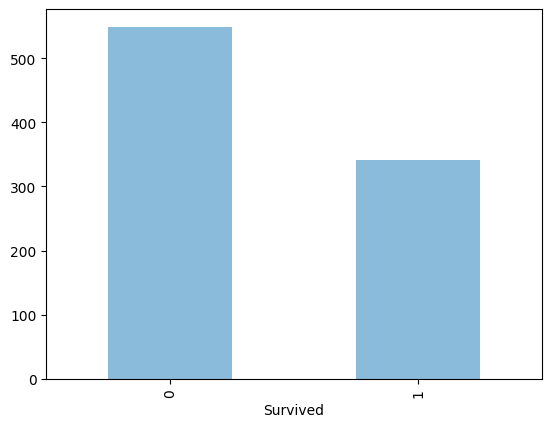

In [ ]:
train_set['Survived'].value_counts().plot(kind = 'bar')
train_set['Survived'].value_counts(normalize=True)

Note que o dataset apresenta uma taxa de sobrevivência de, aproximadamente, 40%. É possível considerá-lo balanceado, já que a diferença não é tão gritante. Por isso, utilizaremos a acurácia como métrica principal para avaliação. Ainda assim, calcularemos o F1 Score para fins de análise.

Desta forma, ao invés de testarmos todos os casos, focaremos apenas nas que mostrarem melhores resultados.

In [ ]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter('ignore', category=ConvergenceWarning)

# Parâmetros de função de ativação
lbfgs = {
    'identity': MLPClassifier(hidden_layer_sizes=(50,50), max_iter=1200, activation='identity', solver='lbfgs', alpha=0.0001),
    'logistic': MLPClassifier(hidden_layer_sizes=(50,50), max_iter=1200, activation='logistic', solver='lbfgs', alpha=0.0001),
    'tanh': MLPClassifier(hidden_layer_sizes=(50,50), max_iter=1200, activation='tanh', solver='lbfgs', alpha=0.0001),
    'relu': MLPClassifier(hidden_layer_sizes=(50,50), max_iter=1200, activation='relu', solver='lbfgs', alpha=0.0001)
}

adam = {
    'identity': MLPClassifier(hidden_layer_sizes=(50,50), max_iter=1200, activation='identity', solver='adam', alpha=0.0001),
    'logistic': MLPClassifier(hidden_layer_sizes=(50,50), max_iter=1200, activation='logistic', solver='adam', alpha=0.0001),
    'tanh': MLPClassifier(hidden_layer_sizes=(50,50), max_iter=1200, activation='tanh', solver='adam', alpha=0.0001),
    'relu': MLPClassifier(hidden_layer_sizes=(50,50), max_iter=1200, activation='relu', solver='adam', alpha=0.0001)
}

sgd = {
    'identity': MLPClassifier(hidden_layer_sizes=(50,50), max_iter=1200, activation='identity', solver='sgd', alpha=0.0001),
    'logistic': MLPClassifier(hidden_layer_sizes=(50,50), max_iter=1200, activation='logistic', solver='sgd', alpha=0.0001),
    'tanh': MLPClassifier(hidden_layer_sizes=(50,50), max_iter=1200, activation='tanh', solver='sgd', alpha=0.0001),
    'relu': MLPClassifier(hidden_layer_sizes=(50,50), max_iter=1200, activation='relu', solver='sgd', alpha=0.0001)
}

# Treinar modelos alternando a função de ativação
print('Solver - lbfgs')
print('-' * 50)
for function, mlp in lbfgs.items():
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    print(f'Function {function} accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Function {function} F1 Score: {f1_score(y_test, y_pred)}\n')
print()

print('Solver - sgd')
print('-' * 50)
for function, mlp in sgd.items():
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    print(f'Function {function} accuracy: {accuracy_score(y_test, y_pred)}',)
    print(f'Function {function} F1 Score: {f1_score(y_test, y_pred)}\n')
print()

print('Solver - adam')
print('-' * 50)
for function, mlp in adam.items():
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    print(f'Function {function} accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Function {function} F1 Score: {f1_score(y_test, y_pred)}\n')
print()

Solver - lbfgs
--------------------------------------------------
Function identity accuracy: 0.8026905829596412
Function identity F1 Score: 0.744186046511628

Function logistic accuracy: 0.7488789237668162
Function logistic F1 Score: 0.6744186046511629

Function tanh accuracy: 0.7623318385650224
Function tanh F1 Score: 0.7039106145251396

Function relu accuracy: 0.7623318385650224
Function relu F1 Score: 0.6863905325443788


Solver - sgd
--------------------------------------------------
Function identity accuracy: 0.7713004484304933
Function identity F1 Score: 0.711864406779661

Function logistic accuracy: 0.600896860986547
Function logistic F1 Score: 0.0

Function tanh accuracy: 0.7847533632286996
Function tanh F1 Score: 0.7241379310344828

Function relu accuracy: 0.7847533632286996
Function relu F1 Score: 0.7176470588235295


Solver - adam
--------------------------------------------------
Function identity accuracy: 0.8026905829596412
Function identity F1 Score: 0.744186046511628


Nota-se que, com exceção do algoritmo de otimização `sgd` com a função `logistic`, cujo F1 Score deu 0.0 - mostrando a má qualidade do modelo, algo que poderia ter passado em branco se apenas a acurácia fosse calculada -, todos os outros resultados apresentaram F1 Scores condizentes com sua acurácia.

No mais, verificamos que o algoritmo de otimização `adam` e as funções `tanh` e `relu` possuem as maiores acurácias. Em seguida, fixamos o `adam` e variamos as funções e a taxa de aprendizagem.

In [ ]:
# Parâmetros de taxa de aprendizagem
invscaling = {
    'tanh': MLPClassifier(hidden_layer_sizes=(50,50), max_iter=800, activation='tanh', solver='adam', alpha=0.0001, learning_rate='invscaling'),
    'relu': MLPClassifier(hidden_layer_sizes=(50,50), max_iter=800, activation='relu', solver='adam', alpha=0.0001, learning_rate='invscaling')
}

adaptive = {
    'tanh': MLPClassifier(hidden_layer_sizes=(50,50), max_iter=800, activation='tanh', solver='adam', alpha=0.0001, learning_rate='adaptive'),
    'relu': MLPClassifier(hidden_layer_sizes=(50,50), max_iter=800, activation='relu', solver='adam', alpha=0.0001, learning_rate='adaptive')
}

# Treinar modelos alternando a taxa de aprendizagem
print('Learning rate - invscaling')
print('-' * 50)
for function, mlp in invscaling.items():
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    print(f'Function {function} accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Function {function} f1 score: {f1_score(y_test, y_pred)}\n')
print()

print('Learning rate - adaptive')
print('-' * 50)
for function, mlp in adaptive.items():
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    print(f'Function {function} accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Function {function} f1 score: {f1_score(y_test, y_pred)}\n')
print()

Learning rate - invscaling
--------------------------------------------------
Function tanh accuracy: 0.820627802690583
Function tanh f1 score: 0.7590361445783134

Function relu accuracy: 0.820627802690583
Function relu f1 score: 0.7499999999999999


Learning rate - adaptive
--------------------------------------------------
Function tanh accuracy: 0.8071748878923767
Function tanh f1 score: 0.7393939393939394

Function relu accuracy: 0.820627802690583
Function relu f1 score: 0.7560975609756098




Encontramos que a taxa de aprendizagem `constant` é a mais acurada entre todas. Portanto, fixamos esse valor e variamos o valor do `alpha`.

In [ ]:
# Parâmetros do alpha
alpha = {
    '0.01': MLPClassifier(hidden_layer_sizes=(50,50), max_iter=800, activation='relu', solver='adam', alpha=0.01, learning_rate='constant'),
    '0.001': MLPClassifier(hidden_layer_sizes=(50,50), max_iter=800, activation='relu', solver='adam', alpha=0.001, learning_rate='constant')
}

# Treinar modelos alternando o 'alpha'
print('Alpha value')
print('-' * 50)
for alpha, mlp in alpha.items():
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    print(f'Alpha {alpha} accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Alpha {alpha} f1 score: {f1_score(y_test, y_pred)}\n')

Alpha value
--------------------------------------------------
Alpha 0.01 accuracy: 0.820627802690583
Alpha 0.01 f1 score: 0.761904761904762

Alpha 0.001 accuracy: 0.7982062780269058
Alpha 0.001 f1 score: 0.7272727272727273



Por fim, trocamos a quantidade de camadas de 2 para 1, apenas para verificar qual é mais acurada.

In [ ]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter('ignore', category=ConvergenceWarning)

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=800, activation='relu', solver='adam', alpha=0.01, learning_rate='constant')
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')

Accuracy: 0.820627802690583
Precision: 0.8356164383561644
Recall: 0.6853932584269663


Chegamos à conclusão, portanto, que a rede neural mais acurada para esse projeto possui os parâmetros:
- **`alpha`:** 0.01
- **`hidden_layer_sizes`:** (100,)
- **`learning_rate`:** constant
- **`activation`:** relu
- **`solver`:** adam

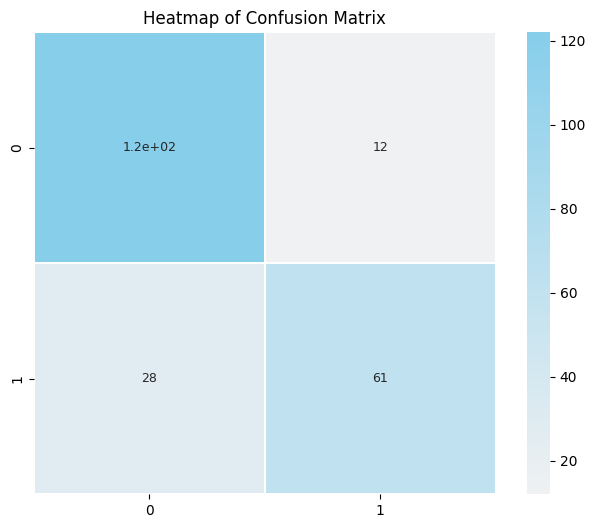

In [ ]:
# Plotar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
cmap = sns.light_palette('skyblue', as_cmap=True)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, square=True, cmap=cmap, annot=True, annot_kws={'size': 9}, linecolor='white', linewidths=0.01)
plt.title('Heatmap of Confusion Matrix')
plt.show()